#Homework 1

##Hurum Maksora Tohfa

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from astropy.timeseries import LombScargle

1

In [2]:
def g(E, e, M):
    return E - e*np.sin(E) - M


def g_prime(E, e):
    return 1 - e * np.cos(E)

def kepler_solver(M, e, tol=1e-6, n=1000):
    E = np.copy(M)
    for i in range(n):
        delta_E = -g(E, e, M) / g_prime(E, e)
        E += delta_E
        if np.all(np.abs(delta_E) < tol):
            break
    return E

e_list = np.linspace(0,1,10)
M_list = np.linspace(0, 2*3.14,10)
for i in range(0,10):
    print(kepler_solver(M_list[i],e_list[i], tol= 1e-6, n=1000) -e_list[i]*np.sin(kepler_solver(M_list[i],e_list[i], tol= 1e-6, n=1000))- M_list[i])


0.0
0.0
0.0
-4.440892098500626e-16
0.0
-4.440892098500626e-16
0.0
8.881784197001252e-16
0.0
8.881784197001252e-16


## 2

In [3]:

def true_anomaly(M, e):
    E = kepler_solver(M, e, tol= 1e-6, n=1000)
    f = 2 * np.arctan(((1 + e) / (1 - e))**(0.5) * np.tan(E / 2))
    return f


def rad_velocity(t,e,P, tp,K, omega, gamma):
    n = 2 * np.pi / P
    M = n * (t - tp)
    f_t = true_anomaly(M, e)
    v_r = K * np.cos(omega)*np.cos(f_t) - K *np.sin(omega)*np.sin(f_t)+ K*e*np.cos(omega)+ gamma
    return v_r



## 3

In [4]:
time = np.loadtxt('mysteryplanet01.txt')[:, 0],
RV =np.loadtxt('mysteryplanet01.txt')[:, 1],
error= np.loadtxt('mysteryplanet01.txt')[:, 2]
time = np.array(time)
RV = np.array(RV)
error = np.array(error)

time = time.flatten()
error = error.flatten()
RV = RV.flatten()

In [5]:
frequency, power = LombScargle(time, RV, error).autopower()

The most likely period of the planet is 60.935690596026504


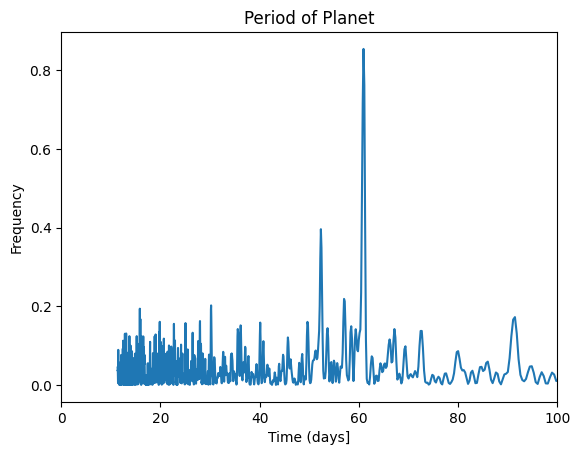

In [6]:
plt.plot (1/frequency, power);
maxpower_index = np.argmax (power);
maxPeriod = 1 / frequency[maxpower_index];
plt.title("Period of Planet")
plt.xlabel("Time (days]")
plt.ylabel("Frequency")
print("The most likely period of the planet is", maxPeriod)
plt.xlim(0, 100)
plt.show()

## 4

In [7]:
def log_likelihood(params, t, RV, error):
    model = rad_velocity(t, *params)
    return -0.5 * np.sum((RV - model)**2 / error**2)

def log_prior(params):
    e, P, tp, K, omega, gamma = params
    if 0 < e < 1 and 0 < P < 100 and 0 < tp < 100 and 0 < K < 100 and -np.pi < omega < np.pi and -100 < gamma < 100:
        return 0.0
    return -np.inf


def log_probability(params, t, RV, error):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, t, RV, error)




In [8]:
np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0, 60, 100, 20,3.14, 10]) + 0.1 * np.random.randn(6)
soln = minimize(nll, initial, args=(time, RV, error))
e_fit, P_fit, tp_fit, K_fit, omega_fit, gamma_fit = soln.x
print(e_fit, P_fit, tp_fit, K_fit, omega_fit, gamma_fit)

0.05362760203812482 60.97273178590518 101.14591962062681 213.64898084656733 5.0141984398648844 42.46258344574347


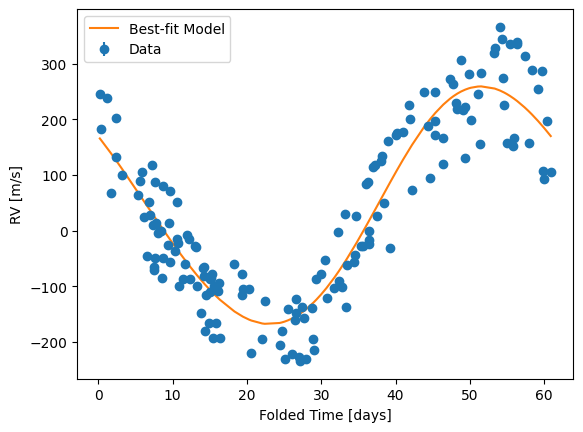

In [9]:
e_fit, P_fit, tp_fit, K_fit, omega_fit, gamma_fit = 0.0536, 60.97, 101.15, 213.65, 5.01, 42.46
best_fit_RV = rad_velocity(time, e_fit, P_fit, tp_fit, K_fit, omega_fit, gamma_fit)

folded_time = time % P_fit
sort_order = np.argsort(folded_time)
plt.figure()

plt.errorbar(folded_time[sort_order], RV[sort_order], yerr=error[sort_order], fmt='o', label='Data')
plt.plot(folded_time[sort_order], best_fit_RV[sort_order], label='Best-fit Model')

plt.xlabel('Folded Time [days]')
plt.ylabel('RV [m/s]')
plt.legend()
plt.show()


## 6. Extra credit: if we subtract the RV model we find another planet with a 30 day period!

In [10]:

RV = RV- rad_velocity(time, e_fit, P_fit, tp_fit, K_fit, omega_fit, gamma_fit)
error= np.loadtxt('mysteryplanet01.txt')[:, 2]
time = np.array(time)
RV = np.array(RV)
error = np.array(error)

time = time.flatten()
error = error.flatten()
RV = RV.flatten()

The most likely period of the planet 2 is 30.20777833223901


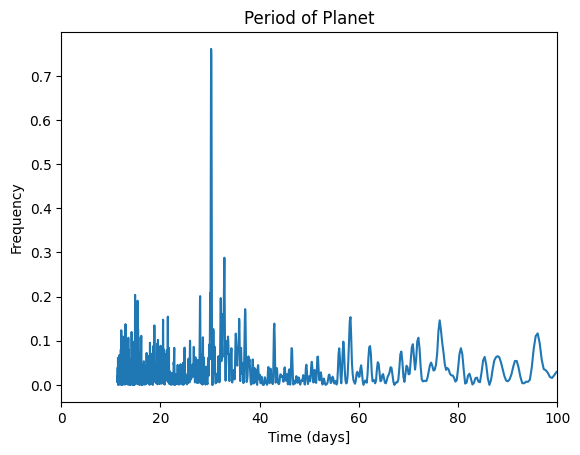

In [11]:
frequency, power = LombScargle(time, RV, error).autopower()
plt.plot (1/frequency, power);
maxpower_index = np.argmax (power);
maxPeriod = 1 / frequency[maxpower_index];
plt.title("Period of Planet")
plt.xlabel("Time (days]")
plt.ylabel("Frequency")
print("The most likely period of the planet 2 is", maxPeriod)
plt.xlim(0, 100)
plt.show()
